***Group 3: No Pun Indented(Emma, Nawaz, Joe, Khadiza, Moses)***

**Credit Card Customers**

We will be analysing a data set of customer information from a bank that is concerned about the high churn rate.
What is Credit Card churning you might ask? Credit Card churning is the practice of repeatedly opening and closing credit card accounts to continually recieve the incentives that are given to those who open new credit card accounts. We will be performing exploratory data analysis on this dataset, to see if we can gain any insight into which customers are more likely to churn and is there anyway of decreasing that number. 

The dataset consists of the following:

CLIENTNUM: Client number, unique identifier to the client

Attrition_Flag: Shows whether customer is existing or attrited

Customer_Age: Shows customers age in years

Gender: Shows customer gender

Dependent_count: Shows number of dependents

Education_Level: Shows educational qualification of the account holder

Marital_Status: Marital status of the account holder(Married, Divorced, Single or Unknown)

Income_Category: Annual income category of the account holder (<$40K, $40K - 60K, $60K - $80K, $80K-$120K)

Card_Category: Type of Credit Card (Blue, Silver, Gold, Platinum)

Months_on_book: Period of relationship with the bank

Total_Relationship_Count: Total number of products held by the customer

Months_Inactive_12_mon: Number of months inactive in the past 12 months

Contacts_Count_12_mon: Number of contacts in the last 12 months

Credit_Limit: Credit limit on the Credit Card

Total_Revolving_Bal: Total revolving balance on the Credit Card

Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1: Change in transaction amount (Quarter 4 over Quarter 1)

Total_Trans_Amt: Total transaction amount (Over last 12 months)

Total_Trans_Ct: Total transaction count (Over last 12 months)

Total_Ct_Chng_Q4_Q1: Change in transaction count (Quarter 4 over Quarter 1)

Avg_Utilization_Ratio: Average Card utilisation ratio




**The questions we are aiming to answer by performing exploratory data analysis are as follows:**

***Q1: Can we compare gender and age to the attrition status of customers, to identify any trends?***

***Q2: How does the familial situation affect the attrition status of customers? Can we use gender, age, marital status and dependents to identify any correlation between familial situation and attrition status?***

***Q3: Does how long the customer has been inactive give any indication to whether a customer may leave? Using months inactive and months on book, can we recognize what may be a trigger point for customers leaving?***

***Q4: Is there a relationship between education and income levels - do higher education and income correlate? Are those with a higher income and higher education level more likely to stay with the bank? Are people with a lower income more likely to leave? (Does a high number of dependents and low income have any effect? *Link this back to Q2*)***

***Q5: What is the relationship between card cateogry and income? Are those with a higher income on a better card, and are those on better cards more likely to stay or leave?***

***Q6: Do customers on higher income have higher transaction levels? Is there any correlation between transaction amounts and how long customers have been inactive?*** 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import scipy.stats as st
import seaborn as sns

In [2]:
# Read the CSV
bank_data = pd.read_csv("bank_churners.csv")
bank_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
# drop any columns of the data that we will not need or investigate. - Drop last columns.
bank_data.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"], inplace=True)
bank_data.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], inplace=True)

In [5]:
bank_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


**Question 1: Comparing age and gender to the number of existing and attrited customers?**

The first figure shows us the overall make-up of the data regarding gender, with 52.9% female and 47.1% male.

The second figure shows us the overall make-up of the data regarding attrition flag, with 83.9% existing customers and 16.1% attrited customers.

The third figure allows us to compare between genders the number of existing and attrited customers. As can be seen in the bar plot, the number of females for both existing and attrited customers is larger, though this is to be expected given that the female gender makes up a slightly larger portion of the dataset.

Following on from this, the customer ages were placed into groups(bins), allowing for easier analysis. This was then visualized in a pie plot, showing the different percentages of the age groups that make-up the dataset.
The fifth figure allows us to compare between the age groups and the number of existing and attrited customers. The bar plot shows us that the age group with the largest number of existing and attrited customers is 40-49. This is supported by the fact that the most often occurring age within the dataset is 44. 

A high standard deviation of 8.02(rounded) shows us that while the 40-49 category is the most populous, the data within the customer ages is spread and varied.



In [91]:
# identifying the columns needed to answer this question
q1_columns = ["Gender", "Attrition_Flag", "Customer_Age"]
# establishing the dataset by adding the columns we needed
card_df = bank_data[q1_columns]
# visualising dataset
card_df

,Gender,Attrition_Flag,Customer_Age
0,M,Existing Customer,45
1,F,Existing Customer,49
2,M,Existing Customer,51
3,F,Existing Customer,40
4,M,Existing Customer,40
...,...,...,...
10122,M,Existing Customer,50
10123,M,Attrited Customer,41
10124,F,Attrited Customer,44
10125,M,Attrited Customer,30


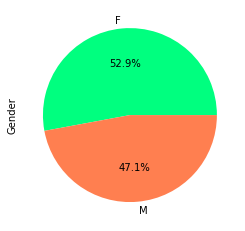

In [7]:
# visualise the genders within the dataset using pie plot

pie_plot = card_df.groupby(["Gender"])["Gender"].count()
pie_plot.plot(kind="pie", y="Gender", autopct="%1.1f%%", colors = ["springgreen", "coral"])

(Fig1) The above pie chart shows the percentage of males and females within the dataset.

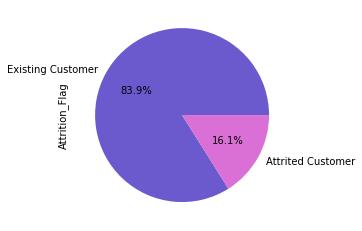

In [8]:
# visualise the number of existing and attrited customers using pie plot

card_df["Attrition_Flag"].value_counts().plot(kind="pie", y="Attrition_Flag", autopct="%1.1f%%", colors=["slateblue", "orchid"])

(Fig2) The above pie chart shows the percentage of existing and attrited customers within the dataset.

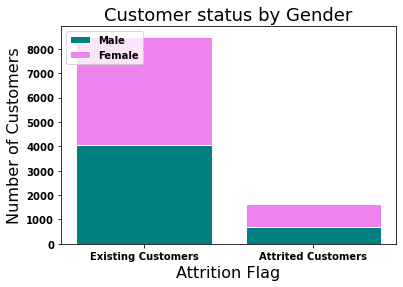

In [169]:
# using .loc method to create two datesets based on gender

female = card_df.loc[card_df["Gender"] == "F"]
male = card_df.loc[card_df["Gender"] == "M"]

# using value counts to get the number of existing and attrited customers for each gender

femaleplot = female["Attrition_Flag"].value_counts()
maleplot = male["Attrition_Flag"].value_counts()
att_flag = ["Existing Customer", "Attrited Customer"] 

r = [0,1]

# plot the stacked bar plot

plt.bar(r, maleplot,color='teal',edgecolor='white')
plt.bar(r, femaleplot,color='violet',edgecolor='white',bottom=maleplot)

names = ['Existing Customers','Attrited Customers']
barWidth = 1

plt.xticks(r, names, fontweight='bold')

plt.xlabel('Attrition Flag', fontsize=16)

plt.ylabel('Number of Customers', fontsize=16)

plt.title("Customer status by Gender",fontsize=18)
plt.legend(Gender,loc=2)
plt.show()

(Fig3) The above plot shows the comparison between customer status and gender within the dataset.

In [94]:
# create bins for ages, separate by attrition flag. Try and visualise in pie chart

bins = [20, 29, 39, 49, 59, 69, 79]
labels = ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]

new_card_df = card_df["Age groups"] = pd.cut(card_df["Customer_Age"], bins, labels=labels)



C:\Users\elsmi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [105]:
merged_df = pd.merge(card_df, new_card_df, how="left", on="Customer_Age")
merged_df

,Gender,Attrition_Flag,Customer_Age,Age groups
0,M,Existing Customer,45,40-49
1,F,Existing Customer,49,40-49
2,M,Existing Customer,51,50-59
3,F,Existing Customer,40,40-49
4,M,Existing Customer,40,40-49
...,...,...,...,...
10122,M,Existing Customer,50,50-59
10123,M,Attrited Customer,41,40-49
10124,F,Attrited Customer,44,40-49
10125,M,Attrited Customer,30,30-39


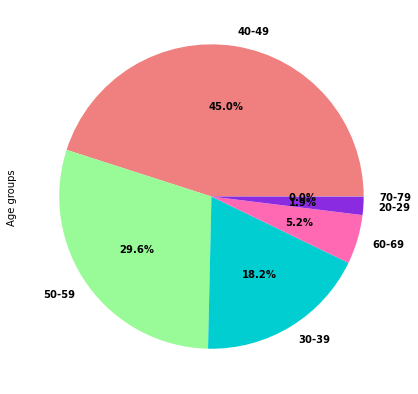

In [126]:
# visualising age groups in pie chart
pieplot = merged_df["Age groups"].value_counts().plot(kind="pie", y="Age groups", autopct="%1.1f%%", colors=["lightcoral", "palegreen", "darkturquoise", "hotpink", "blueviolet", "cornflowerblue"], figsize=(7,7))



(Fig4) The above pie chart shows the percentages of the age groups within the dataset.

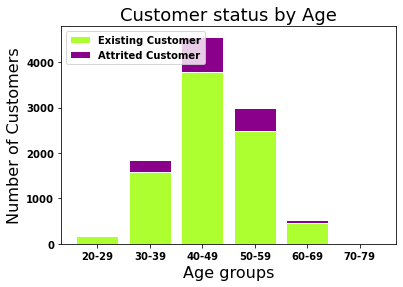

In [168]:
# using .loc method to create two datasets based on existing and attrited customers in the age groups

att_cust = merged_df.loc[card_df["Attrition_Flag"] == "Attrited Customer"]
exist_cust = merged_df.loc[card_df["Attrition_Flag"] == "Existing Customer"]

# using value counts to get the number of each existing/attrited customer for each age group. Using sort_index to make sure they're in the correct order

attplot = att_cust["Age groups"].value_counts().sort_index(ascending=True)
existplot = exist_cust["Age groups"].value_counts().sort_index(ascending=True)
att_flag = ["Existing Customer", "Attrited Customer"] 

r = [0,1,2,3,4,5]

# plot the stacked bar plot

plt.bar(r, existplot,color='greenyellow',edgecolor='white')
plt.bar(r, attplot,color='darkmagenta',edgecolor='white',bottom=existplot)

names = ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]
barWidth = 1

plt.xticks(r, names, fontweight='bold')

plt.xlabel('Age groups', fontsize=16)

plt.ylabel('Number of Customers', fontsize=16)

plt.title("Customer status by Age",fontsize=18)
plt.legend(att_flag,loc=2)
plt.show()

(Fig5) The above plot shows the comparison of customer status and age within the dataset.

In [187]:
mode = card_df["Customer_Age"].mode()
mean = card_df["Customer_Age"].mean()
median = card_df["Customer_Age"].median()
stddev = card_df["Customer_Age"].std()
var = card_df["Customer_Age"].var()

In [189]:
age_stats = pd.DataFrame([{"Mode": mode,
                          "Mean": mean,
                          "Median": median,
                          "Standard Deviation": stddev,
                           "Variance": var
                          }])

In [190]:
age_stats

,Mode,Mean,Median,Standard Deviation,Variance
0,0 44 dtype: int64,46.32596,46.0,8.016814,64.269307


**Question 3: How long have they been inactive? Compare this between the existing and left customers and is there someway we can predict which existing customers will leave?**


The first figure shows us the percentage of customers and the months they have been inactive for. We can see from this pie chart that 3 months makes up the largest percentage of customers. This is then further confirmed in figures 2 and 3.

When using .describe() on the data frame, we can see that the mean for months inactive is 2.34, the standard deviation is 1.01 and the variance is 1.02. These values indicate that the data for months inactive are closer to the mean and are not spread out over a wide range.

Figure 2 is a bar plot showing the number of months a customer was inactive before they left the bank. As can be seen on the plot, the number of customers increases until we reach 3 months, at this point there is a sharp drop off. Is 3 months without activity a trigger point? Perhaps the bank notifies the customer after 3 months of inactivity and this is what causes the customer to leave.

Figure 3 is a bar plot showing the number of months existing customers have been inactive. As in figure 2, there is an increase until we get to 3 months before the number of customers sharply drops off. This supports the idea that the bank may send out notifications after 3 months of activity, causing these customers to start using the credit card again.

Figure 4 is a combination of figures 2 and 3, comparing the number of months inactive for both existing and attrited customers on the same plot.

Figure 5 is a stacked bar plot showing the number of months a customer has been with the bank for both existing and attrited customers. This plot shows us that for both existing and attrited customers, the highest number of customers were in the 30-39 months category. This data could support one of two ideas, the first being that the bank does not have the high churn rate that it anticipates. The second idea is that the credit card may have a certain length of time it has to be had for. 3 years (36 months) is within the 30-39 months category, and this can be supported by the fact that the mean for months on the books is 35.9. It may be that for customers to benefit from the rewards scheme, that they must sign up to have the credit card for 3 years. However, both standard deviation and variance are quite high, so we may not be able to rely on this data.





In [196]:
# months_inactive_12_mon indicates the number of months inactive in the last 12 months.

# identifying the columns required to answer this question
Q3_columns = ["Months_Inactive_12_mon", "Months_on_book", "Attrition_Flag"]
# establishing the dateset by adding the columns we need
q3_df = bank_data[Q3_columns]
# visualising the dataset
q3_df

,Months_Inactive_12_mon,Months_on_book,Attrition_Flag
0,1,39,Existing Customer
1,1,44,Existing Customer
2,1,36,Existing Customer
3,4,34,Existing Customer
4,1,21,Existing Customer
...,...,...,...
10122,2,40,Existing Customer
10123,2,25,Attrited Customer
10124,3,36,Attrited Customer
10125,3,36,Attrited Customer


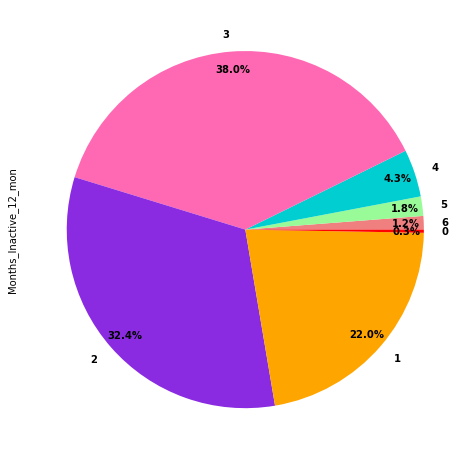

In [237]:
inactive_df = q3_df["Months_Inactive_12_mon"].value_counts().sort_index(ascending=False)

inactive_df.plot(kind="pie", y="Months_Inactive_12_mon", autopct="%1.1f%%", colors = ["lightcoral", "palegreen", "darkturquoise", "hotpink", "blueviolet", "orange", "red"], figsize=(8,10), pctdistance=0.9)

(Fig1) The above pie chart shows the percentage of number of months customers have been inactive.

In [223]:
q3_df.describe()

,Months_Inactive_12_mon,Months_on_book
count,10127.000000,10127.000000
mean,2.341167,35.928409
std,1.010622,7.986416
min,0.000000,13.000000
25%,2.000000,31.000000
50%,2.000000,36.000000
75%,3.000000,40.000000
max,6.000000,56.000000


In [257]:
q3_df["Months_Inactive_12_mon"].var()

1.0213576342059638

In [258]:
q3_df["Months_on_book"].var()

63.78284581001998

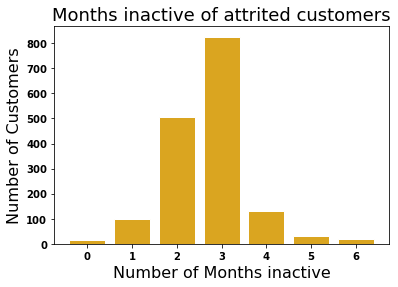

In [243]:
att_cust1 = q3_df.loc[q3_df["Attrition_Flag"] == "Attrited Customer"]
attplot1 = att_cust1["Months_Inactive_12_mon"].value_counts().sort_index(ascending=True)

r = [0,1,2,3,4,5,6]

plt.bar(r, attplot1,color='goldenrod',edgecolor='white')
barWidth = 1

names = ["0", "1", "2", "3", "4", "5", "6"]

plt.xlabel('Number of Months inactive', fontsize=16)

plt.ylabel('Number of Customers', fontsize=16)

plt.title("Months inactive of attrited customers",fontsize=18)

plt.show()

(Fig2) A bar plot showing the number of months a customer has been inactive before they left the bank.

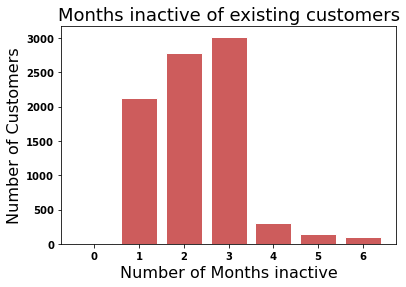

In [244]:
exist_cust1 = q3_df.loc[q3_df["Attrition_Flag"] == "Existing Customer"]
existplot1 = exist_cust1["Months_Inactive_12_mon"].value_counts().sort_index(ascending=True)

r = [0,1,2,3,4,5,6]

plt.bar(r, existplot1,color='indianred',edgecolor='white')
barWidth = 1

names = ["0", "1", "2", "3", "4", "5", "6"]

plt.xlabel('Number of Months inactive', fontsize=16)

plt.ylabel('Number of Customers', fontsize=16)

plt.title("Months inactive of existing customers",fontsize=18)

plt.show()

(Fig3) A bar plot showing the number of months existing customers have been inactive.

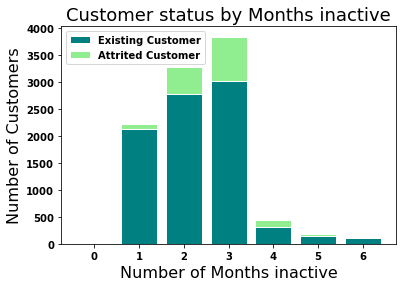

In [256]:
# using .loc method to create two datasets based on existing and attrited customers in different months inactive

att_cust1 = q3_df.loc[q3_df["Attrition_Flag"] == "Attrited Customer"]
exist_cust1 = q3_df.loc[q3_df["Attrition_Flag"] == "Existing Customer"]

# using value counts to get the number of each existing/attrited customer for each month inactive. Using sort_index to make sure they're in the correct order

attplot1 = att_cust1["Months_Inactive_12_mon"].value_counts().sort_index(ascending=True)
existplot1 = exist_cust1["Months_Inactive_12_mon"].value_counts().sort_index(ascending=True)
att_flag = ["Existing Customer", "Attrited Customer"] 

r = [0,1,2,3,4,5,6]

# plot the stacked bar plot

plt.bar(r, existplot1,color='',edgecolor='white')
plt.bar(r, attplot1,color='lightgreen',edgecolor='white',bottom=existplot1)

names = ["0", "1", "2", "3", "4", "5", "6"]
barWidth = 1

plt.xticks(r, names, fontweight='bold')

plt.xlabel('Number of Months inactive', fontsize=16)

plt.ylabel('Number of Customers', fontsize=16)

plt.title("Customer status by Months inactive",fontsize=18)
plt.legend(att_flag,loc=2)
plt.show()

(Fig4) A stacked bar plot showing the number of months inactive for both existing and attrited customers.

In [239]:
q3_df_test = q3_df.loc[q3_df["Attrition_Flag"] == "Existing Customer"]
q3_df_test["Months_Inactive_12_mon"].mode()

0    3
dtype: int64

In [240]:
q3_df_test1 = q3_df.loc[q3_df["Attrition_Flag"] == "Attrited Customer"]
q3_df_test1["Months_Inactive_12_mon"].mode()

0    3
dtype: int64

In [251]:
bins = [10, 19, 29, 39, 49, 59]
labels = ["10-19", "20-29", "30-39", "40-49", "50-59"]

new_month_df = q3_df["Months on book; grouped"] = pd.cut(q3_df["Months_on_book"], bins, labels=labels)

C:\Users\elsmi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [252]:
merge_month = pd.merge(q3_df, new_month_df, how="left", on="Months_on_book")
merge_month

,Months_Inactive_12_mon,Months_on_book,Attrition_Flag,Months on book; grouped
0,1,39,Existing Customer,30-39
1,1,44,Existing Customer,40-49
2,1,36,Existing Customer,30-39
3,4,34,Existing Customer,30-39
4,1,21,Existing Customer,20-29
...,...,...,...,...
10122,2,40,Existing Customer,40-49
10123,2,25,Attrited Customer,20-29
10124,3,36,Attrited Customer,30-39
10125,3,36,Attrited Customer,30-39


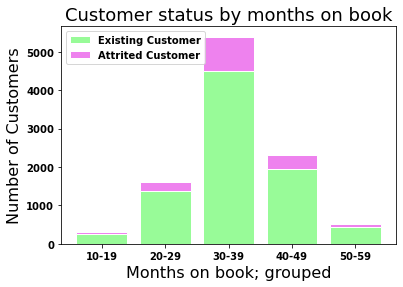

In [255]:
# using .loc method to create two datasets based on months on the books for existing and attrited customers

att_cust2 = merge_month.loc[card_df["Attrition_Flag"] == "Attrited Customer"]
exist_cust2 = merge_month.loc[card_df["Attrition_Flag"] == "Existing Customer"]

# using value counts to get the number of each existing/attrited customer for each age group. Using sort_index to make sure they're in the correct order

attplot2 = att_cust2["Months on book; grouped"].value_counts().sort_index(ascending=True)
existplot2 = exist_cust2["Months on book; grouped"].value_counts().sort_index(ascending=True)
att_flag = ["Existing Customer", "Attrited Customer"] 

r = [0,1,2,3,4]

# plot the stacked bar plot

plt.bar(r, existplot2,color='palegreen',edgecolor='white')
plt.bar(r, attplot2,color='violet',edgecolor='white',bottom=existplot2)

names = ["10-19", "20-29", "30-39", "40-49", "50-59"]
barWidth = 1

plt.xticks(r, names, fontweight='bold')

plt.xlabel('Months on book; grouped', fontsize=16)

plt.ylabel('Number of Customers', fontsize=16)

plt.title("Customer status by months on book",fontsize=18)
plt.legend(att_flag,loc=2)
plt.show()

(Fig5) A stacked bar plot showing the number of months the customer has been with the bank for both existing and attrited customers.